In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# import k-means clustering algorithm || explained in documentation
from sklearn.cluster import KMeans 

In [5]:
std_mrg_kmeans=pd.read_csv(r'C:\Users\m_joekid\Desktop\Startup Success\std_mrg_kmeans.csv')

In [6]:
s_c_std_mrg=pd.read_csv(r'C:\Users\m_joekid\Desktop\Startup Success\s_c_std_mrg.csv')

In [7]:
c_std_mrg=pd.read_csv(r'C:\Users\m_joekid\Desktop\Startup Success\c_std_mrg.csv')

In [8]:
del(c_std_mrg['Unnamed: 0'])
del(s_c_std_mrg['Unnamed: 0'])

## Kmeans Clustering (-1FE||PCA||K=?)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA()

In [11]:
pca.fit(s_c_std_mrg)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.explained_variance_ratio_

array([0.19984419, 0.17508847, 0.16682985, 0.15873865, 0.15360567,
       0.14589317])

Text(0.5, 1.0, 'Explained Variance by components')

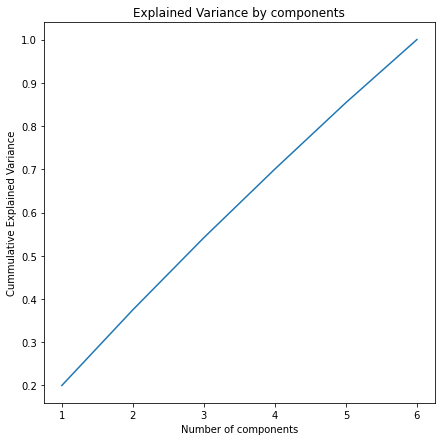

In [14]:
plt.figure(figsize=(7,7))
plt.plot(range(1,7),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Explained Variance by components')

In [15]:
pca=PCA(n_components=4)

In [16]:
pca.fit(s_c_std_mrg)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[ 0.5602702 ,  0.07114797,  0.38253944,  0.37883229, -0.33409964,
        -0.52873659],
       [ 0.35105715,  0.10492922,  0.62180842, -0.44024852,  0.49096589,
         0.21032538],
       [ 0.01776182,  0.9744178 , -0.17027974, -0.09996959, -0.10380917,
         0.0207125 ],
       [-0.12629228,  0.14478688, -0.0229149 ,  0.65053163,  0.72414697,
        -0.12239972]])

In [18]:
p_s_c_std_mrg=pd.DataFrame(pca.components_,columns=c_std_mrg.columns,index=['component 1','component 2','component 3','component 4'])

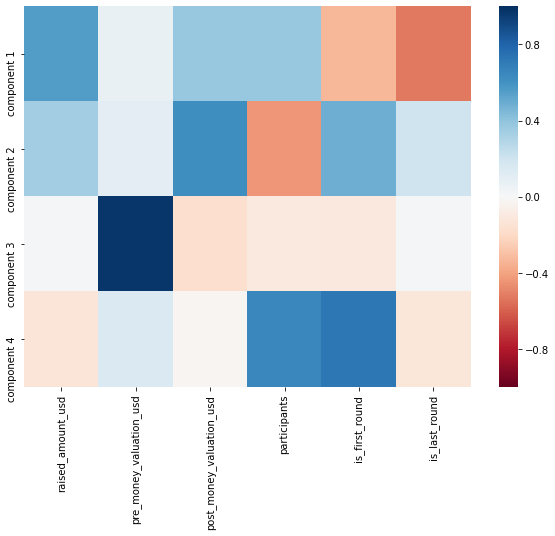

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(p_s_c_std_mrg,vmin=-1,vmax=1,cmap='RdBu')

In [20]:
# keep note of the prefix|| 'pca'=prinicipal components
pca_s_c_std_mrg=pca.transform(s_c_std_mrg)

In [21]:
pca_s_c_std_mrg=pd.DataFrame(pca_s_c_std_mrg)

In [22]:
wcss =[]
for i in range(1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
        kmeans.fit(pca_s_c_std_mrg)
        wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

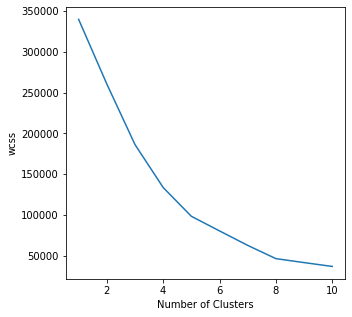

In [23]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

In [24]:
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=101)

In [25]:
kmeans.fit(pca_s_c_std_mrg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [26]:
pca_s_c_std_mrg_kmeans=pca_s_c_std_mrg.copy()
pca_s_c_std_mrg_kmeans['Segment Kmeans']=kmeans.labels_

In [27]:
pca_s_c_std_mrg_kmeans.sample(3)

,0,1,2,3,Segment Kmeans
47919,1.067169,-0.828206,0.077166,-0.565519,5
2185,-0.335101,-0.251390,0.168943,-1.135322,0
59039,0.135918,0.181342,-0.109232,0.748198,1


In [28]:
pca_s_c_std_mrg_kmeans.describe().T

,count,mean,std,min,25%,50%,75%,max
0,80902.0,-4.471044e-15,1.095025,-1.308661,-0.667997,-0.050492,0.621293,43.208095
1,80902.0,1.691955e-15,1.024960,-3.293282,-0.551210,-0.033958,0.558263,46.332559
2,80902.0,1.450361e-16,1.000496,-11.892404,-0.082983,-0.003819,0.119058,276.113641
3,80902.0,3.906172e-15,0.975932,-10.548860,-0.822507,-0.012903,0.573039,39.027373
Segment Kmeans,80902.0,2.460619e+00,1.971422,0.000000,1.000000,3.000000,5.000000,7.000000


In [29]:
pca_s_c_std_mrg_kmeans.to_csv(r'C:\Users\m_joekid\Desktop\Startup Success\pca_s_c_std_mrg_kmeans.csv')